<a href="https://colab.research.google.com/github/Karath-Vamsi/training_an_ANN/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
dataset = pd.read_csv("/content/Churn_Modelling.csv")

In [12]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [14]:
# one hot encoding

geography = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [15]:
X = pd.concat([X,geography,gender],axis=1)
X = X.drop(['Geography','Gender'],axis=1)

In [21]:
# splitting data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [22]:
# feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [24]:
classifier = Sequential()

In [25]:
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dense(units=1,activation='relu'))

In [26]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',
                   metrics=['accuracy'])

In [28]:
import keras

In [29]:
# early stopping

early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=15,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [30]:
model_history = classifier.fit(X_train,y_train,
                               validation_split=0.33,
                               batch_size=10,epochs=50,
                               callbacks=early_stop)

Epoch 1/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8520 - loss: 0.3742 - val_accuracy: 0.8425 - val_loss: 0.4215
Epoch 2/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8574 - loss: 0.3645 - val_accuracy: 0.8417 - val_loss: 0.4315
Epoch 3/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8539 - loss: 0.3984 - val_accuracy: 0.8353 - val_loss: 0.4376
Epoch 4/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8412 - loss: 0.3817 - val_accuracy: 0.8334 - val_loss: 0.4156
Epoch 5/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8565 - loss: 0.3604 - val_accuracy: 0.8368 - val_loss: 0.4165
Epoch 6/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8555 - loss: 0.3684 - val_accuracy: 0.8379 - val_loss: 0.4200
Epoch 7/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8515 - loss: 0.3574 - val_accuracy: 0.8383 - val_loss: 0.4269
Epoch 8/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8566 - loss: 0.3542 - val_accuracy: 0.

In [31]:
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


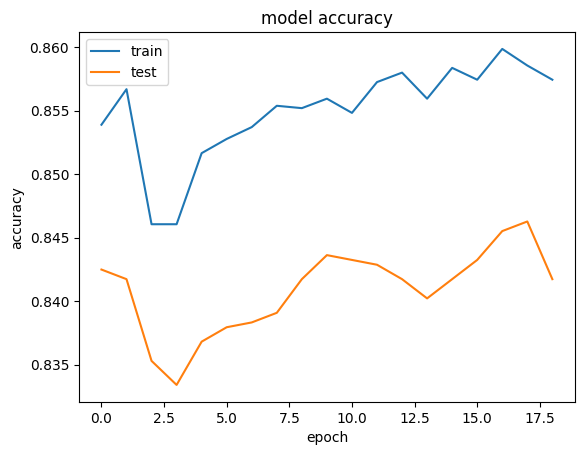

In [32]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

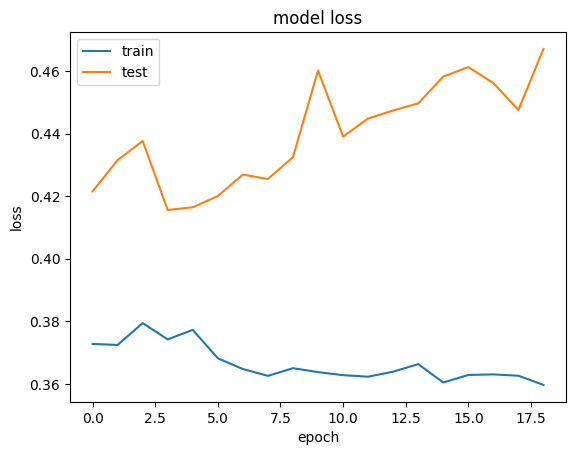

In [33]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
# predictions

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1497,   98],
       [ 195,  210]])

In [37]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8535